 
* **Company** - *String* - Laptop Manufacturer
* **Product** - *String* - Brand and Model
* **TypeName** - *String* - Type (Notebook, Ultrabook, Gaming, etc.)
* **Inches** - *Numeric* - Screen Size
* **ScreenResolution** - *String* - Screen Resolution
* **Cpu** - *String* - Central Processing Unit (CPU)
* **Ram** - *String* - Laptop RAM
* **Memory** - *String* - Hard Disk / SSD Memory
* **GPU** - *String* - Graphics Processing Units (GPU)
* **OpSys** - *String* - Operating System
* **Weight** - *String* - Laptop Weight
* **Price_euros** - *Numeric* - Price (Euro)


In [1]:
import numpy as np 
import pandas as pd 
import re

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 16, 10 

In [3]:
from sklearn.feature_extraction import DictVectorizer

In [4]:
!ls

laptop_price.csv notebook.ipynb


In [5]:
df = pd.read_csv('laptop_price.csv', encoding = "ISO-8859-1")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


## preparation dataset to one style

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [8]:
# drop `laptop_id`
df = df.drop('laptop_id', axis=1)
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [9]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower()
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8gb,128gb ssd,intel iris plus graphics 640,macos,1.37kg,1339.69
1,apple,macbook air,ultrabook,13.3,1440x900,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,1.34kg,898.94
2,hp,250 g6,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8gb,256gb ssd,intel hd graphics 620,no os,1.86kg,575.00
3,apple,macbook pro,ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16gb,512gb ssd,amd radeon pro 455,macos,1.83kg,2537.45
4,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8gb,256gb ssd,intel iris plus graphics 650,macos,1.37kg,1803.60


## EDA

In [10]:
# Chech missing values.
df.isnull().sum()

company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price_euros         0
dtype: int64

In [11]:
# check on duplicates on all columns
df[df.duplicated(keep=False)].sort_values('product')

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
1287,hp,15-ac110nv (i7-6500u/6gb/1tb/radeon,notebook,15.6,1366x768,intel core i7 6500u 2.5ghz,6gb,1tb hdd,amd radeon r5 m330,windows 10,2.19kg,764.00
1301,hp,15-ac110nv (i7-6500u/6gb/1tb/radeon,notebook,15.6,1366x768,intel core i7 6500u 2.5ghz,6gb,1tb hdd,amd radeon r5 m330,windows 10,2.19kg,764.00
1273,hp,15-ac110nv (i7-6500u/6gb/1tb/radeon,notebook,15.6,1366x768,intel core i7 6500u 2.5ghz,6gb,1tb hdd,amd radeon r5 m330,windows 10,2.19kg,764.00
1263,acer,aspire es1-531,notebook,15.6,1366x768,intel celeron dual core n3060 1.6ghz,4gb,500gb hdd,intel hd graphics 400,linux,2.4kg,289.00
1291,acer,aspire es1-531,notebook,15.6,1366x768,intel celeron dual core n3060 1.6ghz,4gb,500gb hdd,intel hd graphics 400,linux,2.4kg,289.00
1277,acer,aspire es1-531,notebook,15.6,1366x768,intel celeron dual core n3060 1.6ghz,4gb,500gb hdd,intel hd graphics 400,linux,2.4kg,289.00
1300,lenovo,ideapad 100s-14ibr,notebook,14.0,1366x768,intel celeron dual core n3050 1.6ghz,2gb,64gb flash storage,intel hd graphics,windows 10,1.5kg,229.00
1272,lenovo,ideapad 100s-14ibr,notebook,14.0,1366x768,intel celeron dual core n3050 1.6ghz,2gb,64gb flash storage,intel hd graphics,windows 10,1.5kg,229.00
1286,lenovo,ideapad 100s-14ibr,notebook,14.0,1366x768,intel celeron dual core n3050 1.6ghz,2gb,64gb flash storage,intel hd graphics,windows 10,1.5kg,229.00
1265,lenovo,ideapad y700-15isk,notebook,15.6,ips panel full hd 1920x1080,intel core i7 6700hq 2.6ghz,8gb,1tb hdd,nvidia geforce gtx 960m,windows 10,2.6kg,899.00


In [12]:
# drop duplicates
print('shape before drop_duplicates =', df.shape)
df = df.drop_duplicates(keep='first')
print('shape after drop_duplicates =', df.shape)

shape before drop_duplicates = (1303, 12)
shape after drop_duplicates = (1275, 12)


In [13]:
# we need check situation when we have the same characteristics, but price isn`t the same.
print('shape before drop_duplicates =', df.shape)
columns_without_price = df.columns.drop('price_euros')
df = df.drop_duplicates(columns_without_price, keep='first')
print('shape after drop_duplicates =', df.shape)
df = df.reset_index(drop=True)
df.head()

shape before drop_duplicates = (1275, 12)
shape after drop_duplicates = (1250, 12)


,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8gb,128gb ssd,intel iris plus graphics 640,macos,1.37kg,1339.69
1,apple,macbook air,ultrabook,13.3,1440x900,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,1.34kg,898.94
2,hp,250 g6,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8gb,256gb ssd,intel hd graphics 620,no os,1.86kg,575.00
3,apple,macbook pro,ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16gb,512gb ssd,amd radeon pro 455,macos,1.83kg,2537.45
4,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8gb,256gb ssd,intel iris plus graphics 650,macos,1.37kg,1803.60


In [14]:
# Count unique number for each categorical features.
df[categorical_columns].nunique()

company              19
product             576
typename              6
screenresolution     40
cpu                 116
ram                   9
memory               39
gpu                 110
opsys                 9
weight              179
dtype: int64

In [15]:
print(df.shape[0])
(df[categorical_columns].nunique() / len(df) * 100).round(2)

1250


company              1.52
product             46.08
typename             0.48
screenresolution     3.20
cpu                  9.28
ram                  0.72
memory               3.12
gpu                  8.80
opsys                0.72
weight              14.32
dtype: float64

Rows count in our dataset `df` are 1303. We can see that `product` has big percent unique values. We will delete their.

notebook              693
gaming                205
ultrabook             190
2 in 1 convertible    110
workstation            29
netbook                23
Name: typename, dtype: int64


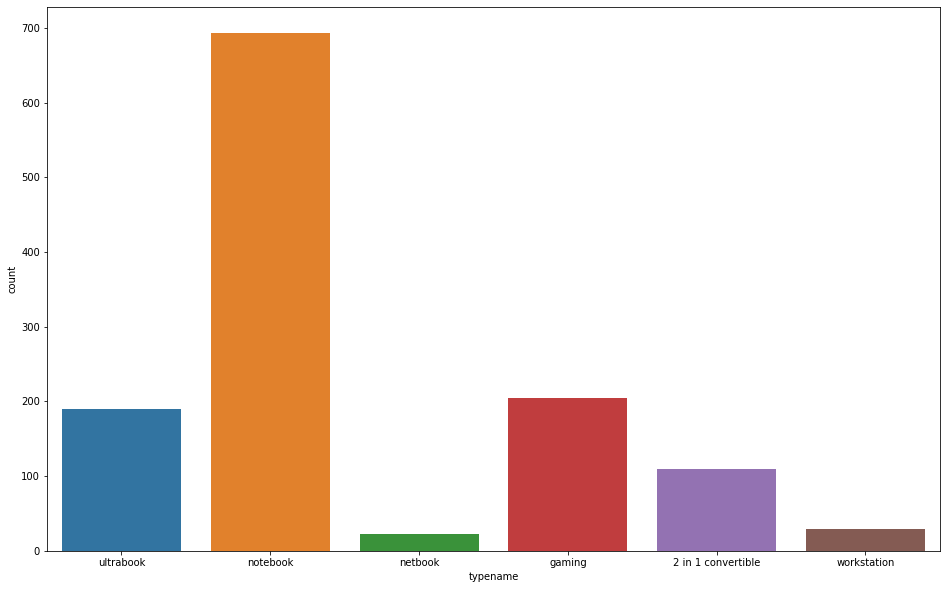

In [16]:
print(df['typename'].value_counts())
sns.countplot(x='typename', data=df);

dell         282
lenovo       279
hp           264
asus         152
acer         100
msi           54
toshiba       47
apple         21
samsung        9
razer          7
mediacom       7
microsoft      6
xiaomi         4
vero           4
chuwi          3
google         3
fujitsu        3
lg             3
huawei         2
Name: company, dtype: int64


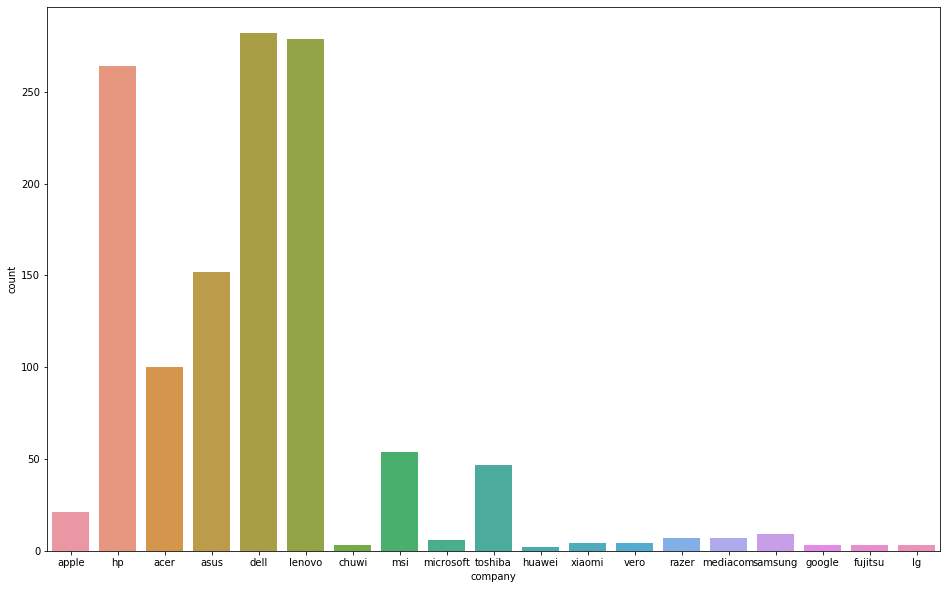

In [17]:
print(df['company'].value_counts())
sns.countplot(x='company', data=df);

We have a few `company`, that meets very rarely.

Delete `company` with lower counts in datasets.

In [27]:
th_hold = 6
rerary_company = df['company'].value_counts()[(df['company'].value_counts() < th_hold)].keys()
for company in rerary_company:
    df = df[df['company'] != company]

In [29]:
df['company'].value_counts()

dell         282
lenovo       279
hp           264
asus         152
acer         100
msi           54
toshiba       47
apple         21
samsung        9
razer          7
mediacom       7
microsoft      6
Name: company, dtype: int64

### RAM

8gb     588
4gb     356
16gb    191
6gb      32
12gb     25
32gb     17
2gb      15
24gb      3
64gb      1
Name: ram, dtype: int64


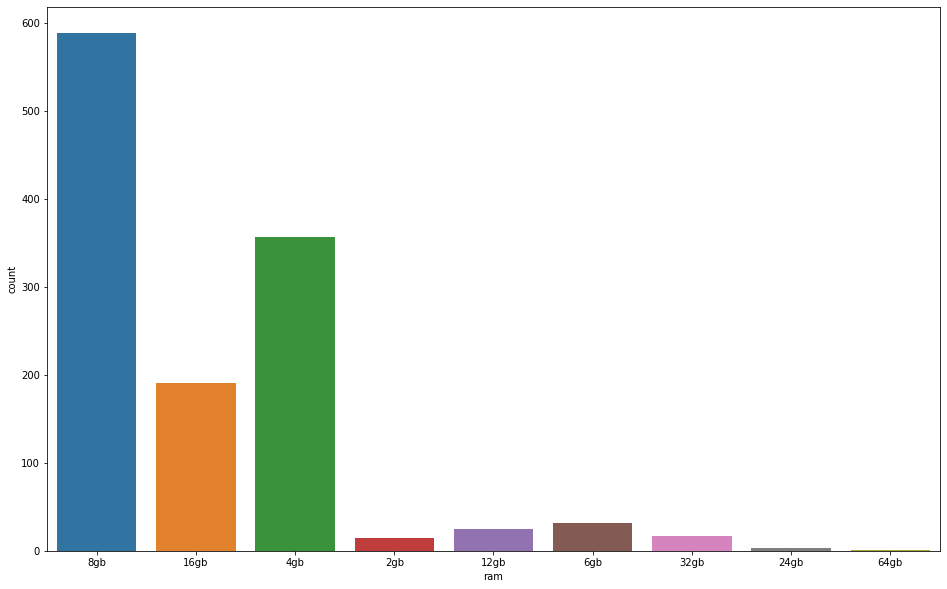

In [30]:
print(df['ram'].value_counts())
sns.countplot(x='ram', data=df);

We have a few `ram`, that meets very rarely.

Delete `ram` with lower counts in datasets.

In [31]:
df = df[df['ram'] != '64gb']
df = df[df['ram'] != '24gb']

windows 10      1006
no os             63
linux             57
windows 7         44
chrome os         24
macos             13
mac os x           8
windows 10 s       8
android            1
Name: opsys, dtype: int64


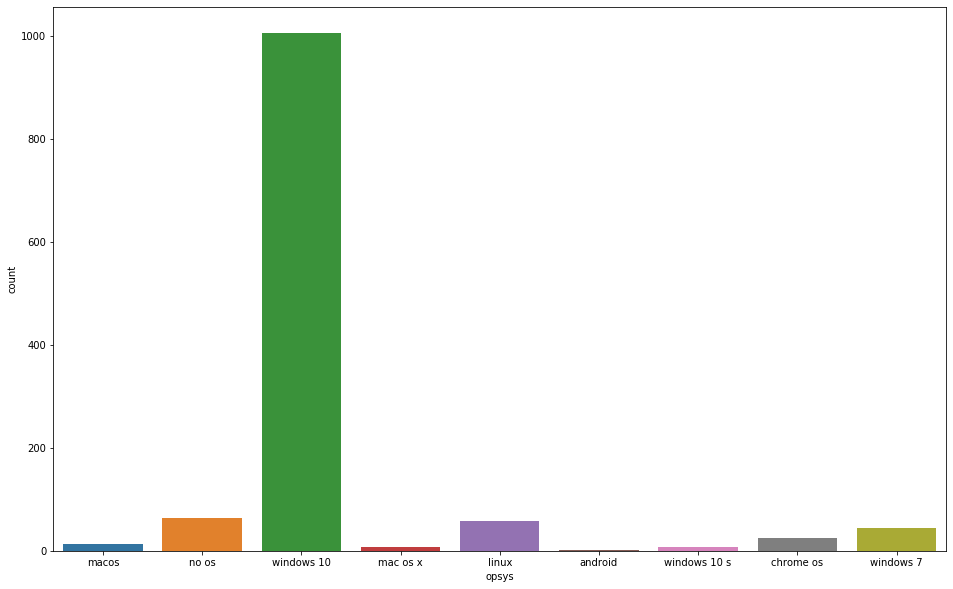

In [33]:
print(df['opsys'].value_counts())
sns.countplot(x='opsys', data=df);

Delete `opsys` with rarely counts in datasets and replace `mac os x` to `macos`,  `windows 10 s` to `windows 10 s`, because they are very similar. 

In [34]:
df = df[df['opsys'] != 'android']


df['opsys'] = df['opsys'].str.replace('mac os x', 'macos')
df['opsys'] = df['opsys'].str.replace('windows 10 s', 'windows 10')

## Feature generation

In [35]:
# convet `weight` to numerical values.
df.loc[:, 'weight'] = df.loc[:, 'weight'].apply(lambda x: float(x[:-2]))
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8gb,128gb ssd,intel iris plus graphics 640,macos,1.37,1339.69
1,apple,macbook air,ultrabook,13.3,1440x900,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,1.34,898.94
2,hp,250 g6,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8gb,256gb ssd,intel hd graphics 620,no os,1.86,575.00
3,apple,macbook pro,ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16gb,512gb ssd,amd radeon pro 455,macos,1.83,2537.45
4,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8gb,256gb ssd,intel iris plus graphics 650,macos,1.37,1803.60


In [36]:
def split_resolution(x):
    width = int(x.split('x')[0])
    height = int(x.split('x')[1])
    return [width, height]

### screenresolution

Lets extract resolution from `screenresolution`.

In [37]:
# lets extract resolution from `screenresolution`.
df['resolution'] = df['screenresolution'].str.extract(r'(\d+x\d+)')
df['screenresolution'] = df['screenresolution'].replace(r'(\d+x\d+)', '', regex=True)
df['width'] = df['resolution'].apply(lambda x: split_resolution(x)[0])
df['height'] = df['resolution'].apply(lambda x: split_resolution(x)[1])

In [38]:
df['screenresolution'].value_counts()

full hd                                 490
                                        288
ips panel full hd                       218
full hd / touchscreen                    46
ips panel full hd / touchscreen          45
touchscreen                              29
ips panel retina display                 16
quad hd+ / touchscreen                   15
ips panel 4k ultra hd                    12
ips panel                                11
ips panel touchscreen                    10
ips panel 4k ultra hd / touchscreen      10
4k ultra hd / touchscreen                 9
4k ultra hd                               7
ips panel quad hd+                        5
ips panel quad hd+ / touchscreen          4
quad hd+                                  3
ips panel touchscreen / 4k ultra hd       2
touchscreen / quad hd+                    1
touchscreen / full hd                     1
touchscreen / 4k ultra hd                 1
Name: screenresolution, dtype: int64

In [39]:
df['touchscreen'] = (df['screenresolution'].str.extract(r'(touchscreen)') == 'touchscreen').astype(int)
df['ips'] = (df['screenresolution'].str.extract(r'(ips)') == 'ips').astype(int)
df['full_hd'] = (df['screenresolution'].str.extract(r'(full hd)') == 'full hd').astype(int)
df['4k_ultra_hd'] = (df['screenresolution'].str.extract(r'(4k ultra hd)') == '4k ultra hd').astype(int)
df['quad_hd'] = (df['screenresolution'].str.extract(r'(quad hd+)') == 'quad hd').astype(int)

In [40]:
df[['touchscreen', 'ips', 'full_hd', '4k_ultra_hd', 'quad_hd']].sum()

touchscreen    173
ips            333
full_hd        800
4k_ultra_hd     41
quad_hd         28
dtype: int64

In [41]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,resolution,width,height,touchscreen,ips,full_hd,4k_ultra_hd,quad_hd
0,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5 2.3ghz,8gb,128gb ssd,intel iris plus graphics 640,macos,1.37,1339.69,2560x1600,2560,1600,0,1,0,0,0
1,apple,macbook air,ultrabook,13.3,,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,1.34,898.94,1440x900,1440,900,0,0,0,0,0
2,hp,250 g6,notebook,15.6,full hd,intel core i5 7200u 2.5ghz,8gb,256gb ssd,intel hd graphics 620,no os,1.86,575.00,1920x1080,1920,1080,0,0,1,0,0
3,apple,macbook pro,ultrabook,15.4,ips panel retina display,intel core i7 2.7ghz,16gb,512gb ssd,amd radeon pro 455,macos,1.83,2537.45,2880x1800,2880,1800,0,1,0,0,0
4,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5 3.1ghz,8gb,256gb ssd,intel iris plus graphics 650,macos,1.37,1803.60,2560x1600,2560,1600,0,1,0,0,0


### CPU

In [42]:
df['ghz'] = df['cpu'].str.extract(r'(\d+(?:\.\d+)?ghz)') 
df['ghz'] = df['ghz'].apply(lambda x: x[:-3]).astype(float)
df['cpu'] = df['cpu'].replace(r'(\d+(?:\.\d+)?ghz)', '', regex=True)

In [43]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,price_euros,resolution,width,height,touchscreen,ips,full_hd,4k_ultra_hd,quad_hd,ghz
0,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5,8gb,128gb ssd,intel iris plus graphics 640,macos,...,1339.69,2560x1600,2560,1600,0,1,0,0,0,2.3
1,apple,macbook air,ultrabook,13.3,,intel core i5,8gb,128gb flash storage,intel hd graphics 6000,macos,...,898.94,1440x900,1440,900,0,0,0,0,0,1.8
2,hp,250 g6,notebook,15.6,full hd,intel core i5 7200u,8gb,256gb ssd,intel hd graphics 620,no os,...,575.00,1920x1080,1920,1080,0,0,1,0,0,2.5
3,apple,macbook pro,ultrabook,15.4,ips panel retina display,intel core i7,16gb,512gb ssd,amd radeon pro 455,macos,...,2537.45,2880x1800,2880,1800,0,1,0,0,0,2.7
4,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5,8gb,256gb ssd,intel iris plus graphics 650,macos,...,1803.60,2560x1600,2560,1600,0,1,0,0,0,3.1


In [44]:
def extract_brand(x):
    return x.split(' ')[0]

In [45]:
df['cpu'].apply(lambda x: extract_brand(x)).value_counts()

intel      1163
amd          59
samsung       1
Name: cpu, dtype: int64

Delete `samsung` cpu brand with lower counts in datasets.

In [46]:
df = df[~df['cpu'].str.startswith('samsung')]

In [47]:
df['cpu_intel'] = (df['cpu'].str.extract(r'(intel)') == 'intel').astype(int)
df['cpu_amd'] = (df['cpu'].str.extract(r'(amd)') == 'amd').astype(int)

### GPU

In [48]:
df['gpu'].apply(lambda x: extract_brand(x)).value_counts()

intel     670
nvidia    385
amd       167
Name: gpu, dtype: int64

In [49]:
df['gpu_intel'] = (df['gpu'].str.extract(r'(intel)') == 'intel').astype(int)
df['gpu_nvidia'] = (df['gpu'].str.extract(r'(nvidia)') == 'nvidia').astype(int)
df['gpu_amd'] = (df['gpu'].str.extract(r'(amd)') == 'amd').astype(int)

In [50]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,ips,full_hd,4k_ultra_hd,quad_hd,ghz,cpu_intel,cpu_amd,gpu_intel,gpu_nvidia,gpu_amd
0,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5,8gb,128gb ssd,intel iris plus graphics 640,macos,...,1,0,0,0,2.3,1,0,1,0,0
1,apple,macbook air,ultrabook,13.3,,intel core i5,8gb,128gb flash storage,intel hd graphics 6000,macos,...,0,0,0,0,1.8,1,0,1,0,0
2,hp,250 g6,notebook,15.6,full hd,intel core i5 7200u,8gb,256gb ssd,intel hd graphics 620,no os,...,0,1,0,0,2.5,1,0,1,0,0
3,apple,macbook pro,ultrabook,15.4,ips panel retina display,intel core i7,16gb,512gb ssd,amd radeon pro 455,macos,...,1,0,0,0,2.7,1,0,0,0,1
4,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5,8gb,256gb ssd,intel iris plus graphics 650,macos,...,1,0,0,0,3.1,1,0,1,0,0


### memory

In [51]:
df['memory'].value_counts()

256gb ssd                        391
1tb hdd                          213
500gb hdd                        122
512gb ssd                        104
128gb ssd +  1tb hdd              92
128gb ssd                         73
256gb ssd +  1tb hdd              72
32gb flash storage                31
2tb hdd                           16
512gb ssd +  1tb hdd              14
1tb ssd                           13
256gb flash storage                8
256gb ssd +  2tb hdd               8
64gb flash storage                 7
16gb flash storage                 7
1.0tb hybrid                       7
32gb ssd                           6
180gb ssd                          5
128gb flash storage                4
512gb ssd +  2tb hdd               3
16gb ssd                           3
512gb flash storage                2
1tb ssd +  1tb hdd                 2
256gb ssd +  500gb hdd             2
128gb ssd +  2tb hdd               2
256gb ssd +  256gb ssd             2
512gb ssd +  256gb ssd             1
5

Extracy type of memory.

In [52]:
df['memory_ssd'] = (df['memory'].str.extract(r'(ssd)') == 'ssd').astype(int)
df['memory_hdd'] = (df['memory'].str.extract(r'(hdd)') == 'hdd').astype(int)
df['memory_flash'] = (df['memory'].str.extract(r'(flash storage)') == 'flash storage').astype(int)

In [54]:
def split_memory(x, type_memory):
    """
    x: str
    type_memory: str
    
    split `str` by "+"
    and extract storege size for each type_memory 
    """
    
    res = x.split('+')
    
    ssd_value = 0
    hdd_value = 0
    flash_value = 0 
    for _ in res:
        
        count_gb = int(re.findall(r'\d+', _)[0])
        if 'tb' in _:
            count_gb = count_gb * 1024
        
        if 'ssd' in _:
            ssd_value += count_gb
        elif 'hdd' in _:
            hdd_value += count_gb
        else:
            flash_value += count_gb
            
    if type_memory == 'ssd':
        return ssd_value
    elif type_memory == 'hdd':
        return hdd_value
    else:
        return flash_value

In [55]:
df['ssd_value'] = df['memory'].apply(lambda x: split_memory(x, 'ssd'))
df['hdd_value'] = df['memory'].apply(lambda x: split_memory(x, 'hdd'))
df['flash_value'] = df['memory'].apply(lambda x: split_memory(x, 'flash'))

In [56]:
df.head(10)

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,cpu_amd,gpu_intel,gpu_nvidia,gpu_amd,memory_ssd,memory_hdd,memory_flash,ssd_value,hdd_value,flash_value
0,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5,8gb,128gb ssd,intel iris plus graphics 640,macos,...,0,1,0,0,1,0,0,128,0,0
1,apple,macbook air,ultrabook,13.3,,intel core i5,8gb,128gb flash storage,intel hd graphics 6000,macos,...,0,1,0,0,0,0,1,0,0,128
2,hp,250 g6,notebook,15.6,full hd,intel core i5 7200u,8gb,256gb ssd,intel hd graphics 620,no os,...,0,1,0,0,1,0,0,256,0,0
3,apple,macbook pro,ultrabook,15.4,ips panel retina display,intel core i7,16gb,512gb ssd,amd radeon pro 455,macos,...,0,0,0,1,1,0,0,512,0,0
4,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5,8gb,256gb ssd,intel iris plus graphics 650,macos,...,0,1,0,0,1,0,0,256,0,0
5,acer,aspire 3,notebook,15.6,,amd a9-series 9420,4gb,500gb hdd,amd radeon r5,windows 10,...,1,0,0,1,0,1,0,0,500,0
6,apple,macbook pro,ultrabook,15.4,ips panel retina display,intel core i7,16gb,256gb flash storage,intel iris pro graphics,macos,...,0,1,0,0,0,0,1,0,0,256
7,apple,macbook air,ultrabook,13.3,,intel core i5,8gb,256gb flash storage,intel hd graphics 6000,macos,...,0,1,0,0,0,0,1,0,0,256
8,asus,zenbook ux430un,ultrabook,14.0,full hd,intel core i7 8550u,16gb,512gb ssd,nvidia geforce mx150,windows 10,...,0,0,1,0,1,0,0,512,0,0
9,acer,swift 3,ultrabook,14.0,ips panel full hd,intel core i5 8250u,8gb,256gb ssd,intel uhd graphics 620,windows 10,...,0,1,0,0,1,0,0,256,0,0


Drop unnessery columns.

In [59]:
df.columns

Index(['company', 'product', 'typename', 'inches', 'screenresolution', 'cpu',
       'ram', 'memory', 'gpu', 'opsys', 'weight', 'price_euros', 'resolution',
       'width', 'height', 'touchscreen', 'ips', 'full_hd', '4k_ultra_hd',
       'quad_hd', 'ghz', 'cpu_intel', 'cpu_amd', 'gpu_intel', 'gpu_nvidia',
       'gpu_amd', 'memory_ssd', 'memory_hdd', 'memory_flash', 'ssd_value',
       'hdd_value', 'flash_value'],
      dtype='object')

In [60]:
df = df.drop(['product', 'screenresolution', 'cpu', 'gpu', 'memory', 'resolution'], axis=1)
df.head()

,company,typename,inches,ram,opsys,weight,price_euros,width,height,touchscreen,...,cpu_amd,gpu_intel,gpu_nvidia,gpu_amd,memory_ssd,memory_hdd,memory_flash,ssd_value,hdd_value,flash_value
0,apple,ultrabook,13.3,8gb,macos,1.37,1339.69,2560,1600,0,...,0,1,0,0,1,0,0,128,0,0
1,apple,ultrabook,13.3,8gb,macos,1.34,898.94,1440,900,0,...,0,1,0,0,0,0,1,0,0,128
2,hp,notebook,15.6,8gb,no os,1.86,575.00,1920,1080,0,...,0,1,0,0,1,0,0,256,0,0
3,apple,ultrabook,15.4,16gb,macos,1.83,2537.45,2880,1800,0,...,0,0,0,1,1,0,0,512,0,0
4,apple,ultrabook,13.3,8gb,macos,1.37,1803.60,2560,1600,0,...,0,1,0,0,1,0,0,256,0,0


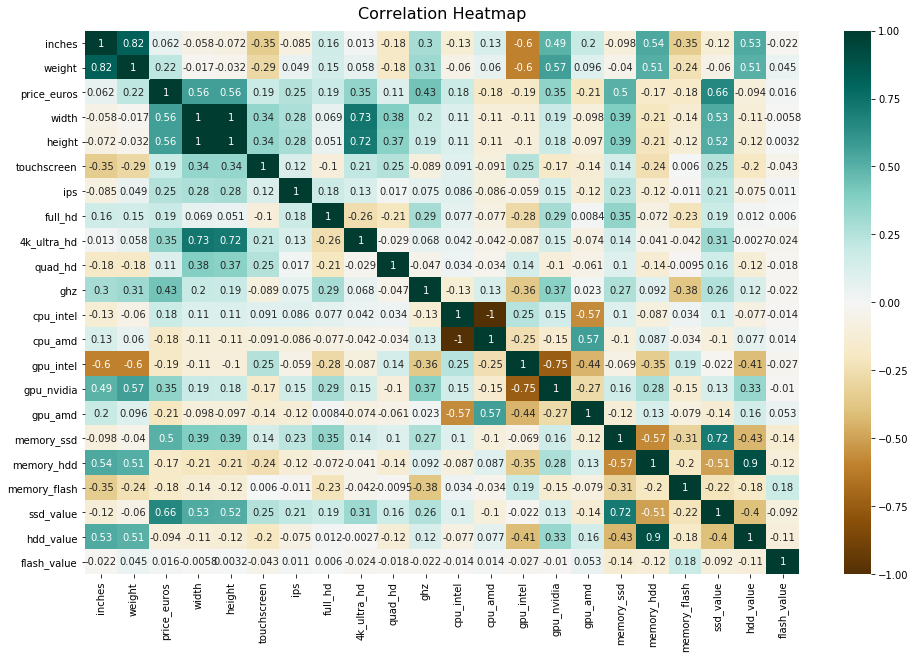

In [66]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

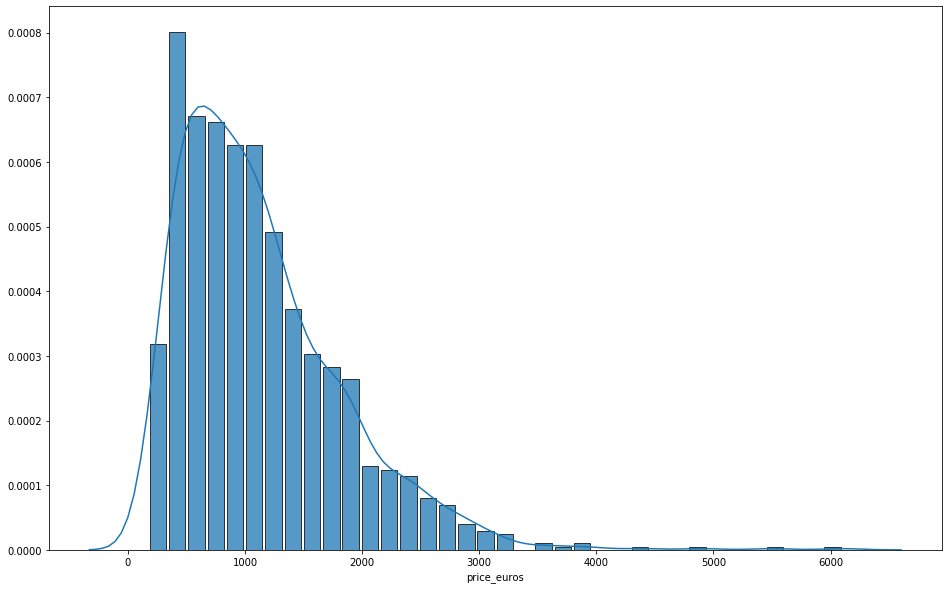

In [68]:
sns.distplot(df['price_euros'], hist_kws={'rwidth':0.85, 'edgecolor':'black', 'alpha':0.75});

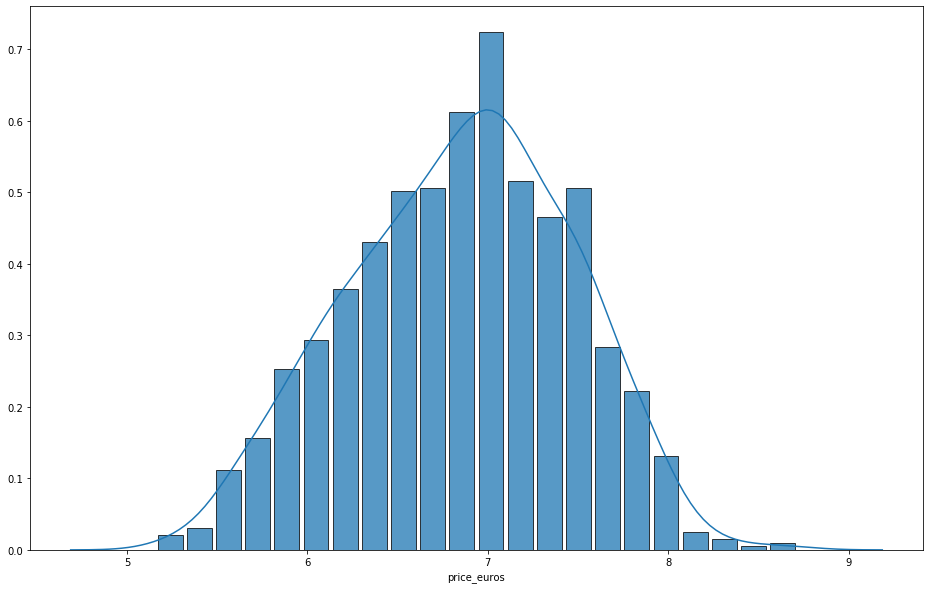

In [70]:
sns.distplot(np.log(df['price_euros']), hist_kws={'rwidth':0.85, 'edgecolor':'black', 'alpha':0.75});

Transform our target columns.

In [76]:
df['log_price'] = np.log(df['price_euros'])

## BUILD MODELS

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

import sklearn


import xgboost as xgb

In [78]:
# Split our data to train, validation and test.

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=7)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=7)

In [79]:
y_full_train = df_full_train[['price_euros', 'log_price']]
y_train = df_train[['price_euros', 'log_price']]
y_test = df_test[['price_euros', 'log_price']]
y_val = df_val[['price_euros', 'log_price']]

df_full_train = df_full_train.drop(['price_euros', 'log_price'], axis=1)
df_train = df_train.drop(['price_euros', 'log_price'], axis=1)
df_test = df_test.drop(['price_euros', 'log_price'], axis=1)
df_val = df_val.drop(['price_euros', 'log_price'], axis=1)

In [81]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [82]:
rf = RandomForestRegressor(random_state=7, n_jobs=-1)

In [ ]:
# sorted(sklearn.metrics.SCORERS.keys())

In [83]:
folds = KFold(n_splits=3, shuffle=True, random_state=7)

parameters = {'n_estimators':[50, 100, 150, 200, 250], 'max_depth':[3, 4, 5, 6, 7, 8, 9, 10],
             'max_features': ["auto", "sqrt", "log2"]}


model_cv = GridSearchCV(rf, 
                        param_grid=parameters, 
                        scoring='neg_mean_absolute_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True, n_jobs=-1)

In [ ]:
1/0

In [ ]:
можна без валідаційного датасету, бо ми робимо KFold валідаціЮ!

In [ ]:
model_cv.fit()

In [ ]:
rf = RandomForestRegressor(n_estimators=150, random_state=7, n_jobs=-1, max_depth=10)
rf.fit(X_train, y_train['log_price'].values.ravel())
y_pred_val = rf.predict(X_val)

In [ ]:
mean_squared_error(y_test['log_price'].values.ravel(), y_pred, squared=False).round(3)
# mean_squared_error(y_test.values.ravel(), y_pred, squared=True).round(3)

In [ ]:
y_test['y_hat'] = y_pred
y_test['y_pred_price'] = np.exp(y_test['y_hat'])
y_test['abs_error'] = abs(y_test['price_euros'] - y_test['y_pred_price'])
y_test.sort_values('abs_error', ascending=False).head(20)

In [ ]:
y_test['y_pred_price'] = np.exp(y_test['y_hat'])

In [ ]:
y_test['abs_error'] = abs(y_test['price_euros'] - y_test['y_pred_price'])
y_test

In [ ]:
np.mean(y_test['abs_error']), np.median(y_test['abs_error'])

In [ ]:
sorted(list(zip(rf.feature_importances_, dv.feature_names_)), key=lambda x: x[0])

In [ ]:
1/0

In [ ]:
df.loc[195, :]

In [ ]:
y_test.loc[195, :]

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(n_estimators=250, max_depth=4, objective='reg:squarederror',
                    learning_rate=0.01, subsample=0.6, colsample_bytree=0.5)

In [ ]:
folds = KFold(n_splits=3, shuffle=True, random_state=7)

parameters = {'n_estimators': [150, 200, 250], 
              'max_depth': [4, 5, 6], 
              'learning_rate': [0.1, 0.01],
              'colsample_bytree': [0.5], 
              'subsample': [0.6], 
             'eta': [.3, .2, .1, .05, .01, .005]}

model_xgb = GridSearchCV(model, 
                        param_grid=parameters, 
                        scoring='neg_mean_absolute_error', 
                        cv=folds, 
                        verbose=1,
                        return_train_score=True, n_jobs=-1)

In [ ]:
model_xgb.fit(X_train, y_train['log_price'].values.ravel())

In [ ]:
model_xgb.best_params_

In [ ]:
model = XGBRegressor(n_estimators=250, max_depth=4, objective='reg:squarederror',
                    learning_rate=0.1, subsample=0.6, colsample_bytree=0.5, eta=0.3)

In [ ]:
model.fit(X_train, y_train['log_price'].values.ravel())

In [ ]:
y_hat = model.predict(X_test)

In [ ]:
mean_squared_error(y_test['log_price'].values.ravel(), y_hat, squared=False).round(3)

In [ ]:
y_test['y_hat_xgb'] = y_hat
y_test['y_pred_price_xgb'] = np.exp(y_test['y_hat_xgb'])
y_test['abs_error_xgb'] = abs(y_test['price_euros'] - y_test['y_pred_price_xgb'])
y_test.sort_values('abs_error_xgb', ascending=False).head(20)

In [ ]:
np.mean(y_test['abs_error_xgb']), np.median(y_test['abs_error_xgb'])

In [ ]:
print(y_test['abs_error_xgb'].describe())

y_test['abs_error_xgb'].hist(bins=30, rwidth=0.8, color='blue', alpha=0.8)
y_test[y_test['abs_error'] < 1000]['abs_error'].hist(bins=30, rwidth=0.8, color='green', alpha=0.8)

In [ ]:
np.mean(y_test[y_test['abs_error'] < 1000]['abs_error']), np.median(y_test[y_test['abs_error'] < 1000]['abs_error'])

In [ ]:
np.mean(y_test['abs_error']), np.median(y_test['abs_error'])